# Tarea 4
### Juan Esteban Arboleda
### Luccas Rojas

# 1. Carga de los archivos 

In [391]:
import os
import pandas as pd
import numpy as np
import gensim
import re
import nltk
from gensim.models import KeyedVectors
from IPython.display import display_html
import pandas as pd

In [392]:
shakespeare = '../data/Shakespeare'
jane_austen = '../data/JaneAusten'
lovecraft = '../data/Lovecraft'

def load_books(path):
    """
    Carga los libros de un autor y los devuelve en una lista
    Params:
    ------
    path: str
        Path de la carpeta que contiene los libros
    Returns:
    -------
    books: list
        Lista de strings, cada uno representa un libro
    """
    books = []
    book_paths = os.listdir(path)
    for book_path in book_paths:
        book = open(path + '/' + book_path, 'r', encoding='utf-8')
        books.append(book.read())
        book.close()
    return books
shakespeare_books = load_books(shakespeare)
jane_austen_books = load_books(jane_austen)
lovecraft_books = load_books(lovecraft)

books = {'shakespeare': shakespeare_books, 'jane_austen': jane_austen_books, 'lovecraft': lovecraft_books}

In [393]:
def normalize(sentence:str)->str:
    """
    Normalize a sentence by lowercasing it and removing non alphanumeric characters
    Params:
    -------
        sentence: sentence to normalize
    Returns:
    --------
        sentence: normalized sentence
    """

    sentence = re.sub(r"[^(a-zA-Z0-9\s)]", " ", sentence).lower().replace("\n", " ")

    return sentence

for author in books.keys():
    for i in range(len(books[author])):
        books[author][i] = normalize(books[author][i])

In [394]:
def tokenize(document:str)->list:
    """
    Tokenize a document
    Params:
    -------
        document: document to tokenize  
    Returns:
    --------
        tokens: list of tokens
    """
    return gensim.utils.simple_preprocess(document, deacc=True)

books_list =[]
for author in books.keys():
    for book in books[author]:
        books_list.append(tokenize(book))

In [395]:
PATH_EMBEDDINGS_50 = "../models/books_50_l.rojasb_j.arboleda.model"
embeddings_50 = gensim.models.Word2Vec(books_list, vector_size=50, window=4, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_50):
    embeddings_50.train(books_list,total_examples=len(books_list),epochs=80)

    embeddings_50.save(PATH_EMBEDDINGS_50)
    print("Modelo creado y guardado")
else:
    embeddings_50 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_50)
    print("Modelo cargado")

Modelo cargado


In [396]:
PATH_EMBEDDINGS_100 = "../models/books_100_l.rojasb_j.arboleda.model"
embeddings_100 = gensim.models.Word2Vec(books_list, vector_size=100, window=4, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_100):
    embeddings_100.train(books_list,total_examples=len(books_list),epochs=80)

    embeddings_100.save(PATH_EMBEDDINGS_100)
    print("Modelo creado y guardado")
else:
    embeddings_100 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_100)
    print("Modelo cargado")

Modelo cargado


In [397]:
PATH_EMBEDDINGS_150 = "../models/books_150_l.rojasb_j.arboleda.model"
embeddings_150 = gensim.models.Word2Vec(books_list, vector_size=150, window=4, min_count=2, workers=10)
if not os.path.exists(PATH_EMBEDDINGS_150):
    embeddings_150.train(books_list,total_examples=len(books_list),epochs=80)

    embeddings_150.save(PATH_EMBEDDINGS_150)
    print("Modelo creado y guardado")
else:
    embeddings_150 = gensim.models.Word2Vec.load(PATH_EMBEDDINGS_150)
    print("Modelo cargado")

Modelo cargado


In [398]:
embeddings_50.wv.most_similar('cat', topn=5)

[('flown', 0.6888938546180725),
 ('expressly', 0.681670606136322),
 ('rung', 0.6781139373779297),
 ('digg', 0.6672011613845825),
 ('paste', 0.6632798910140991)]

In [399]:
relationship = embeddings_50.wv['queen'] - embeddings_50.wv['king'] + embeddings_50.wv['man']

# Encuentra palabras más similares a la relación calculada
embeddings_50.wv.most_similar([relationship], topn=3)

[('man', 0.7589766383171082),
 ('woman', 0.5158048868179321),
 ('sonnet', 0.5034587979316711)]

# 2. Visualizacion

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_word_embeddings(model, words_to_visualize, perplexity=30):
    """
    Visualize word embeddings using TSNE in a 2D space
    Params:
    -------
        model: gensim word2vec model
        words_to_visualize: list of words to visualize
    Returns:   
    --------
        None
    """

    similar_words = {search_term: model.wv.most_similar(search_term, topn=5)
                   for search_term in words_to_visualize}
    
    words = sum([[k] + [v[0] for v in similar_words[k]] for k in similar_words.keys()], [])
    word_vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=perplexity)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(word_vectors)
    labels = words

    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [401]:
main_characters = [
    "hamlet", "romeo", "juliet", "macbeth", "darcy", "elizabeth",
    "emma", "cthulhu", "dyer", "wilbur"
]
words = ['man', 'queen', 'king', 'queen']

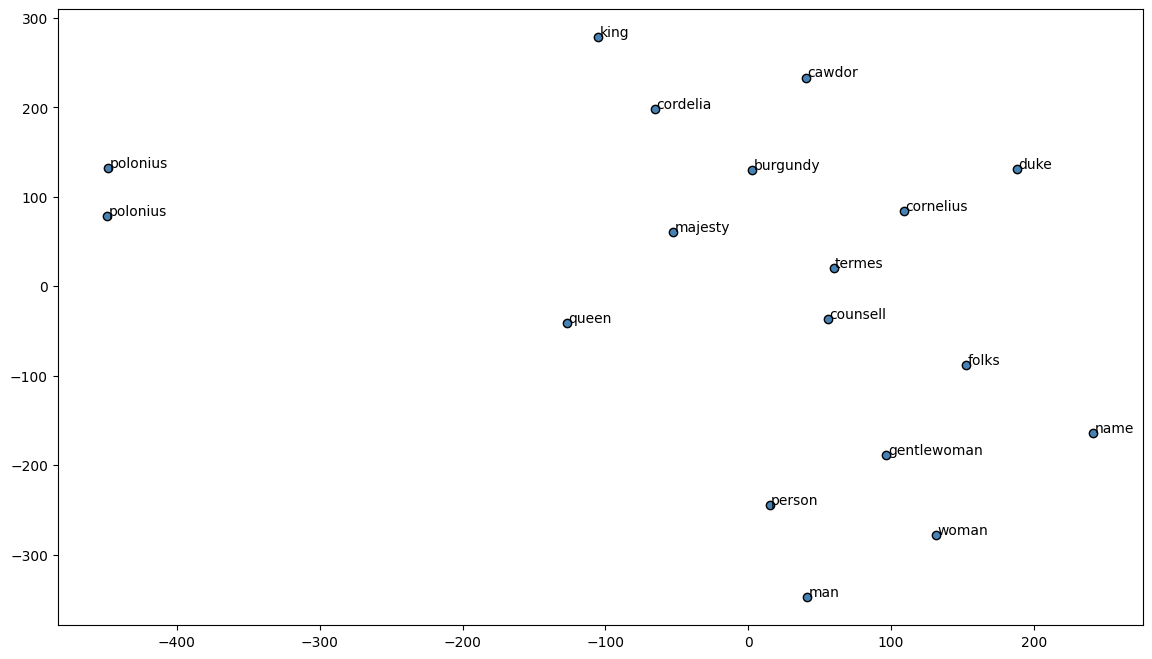

In [402]:
visualize_word_embeddings(embeddings_50, words, perplexity=3)

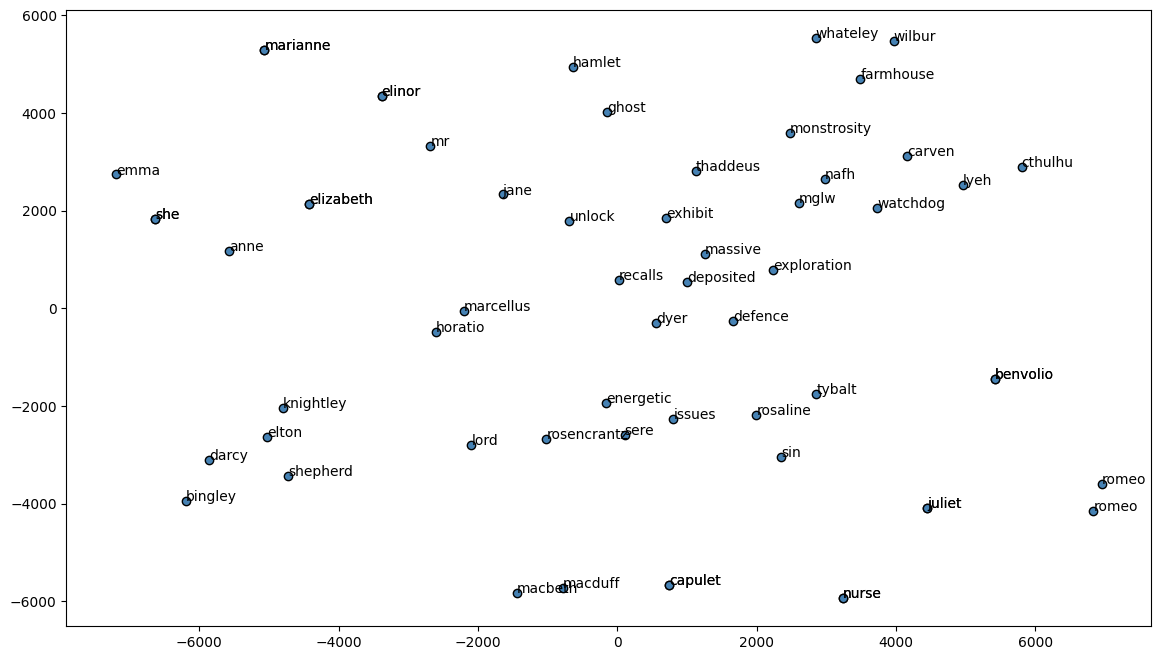

In [403]:
visualize_word_embeddings(embeddings_100, main_characters, perplexity=5)

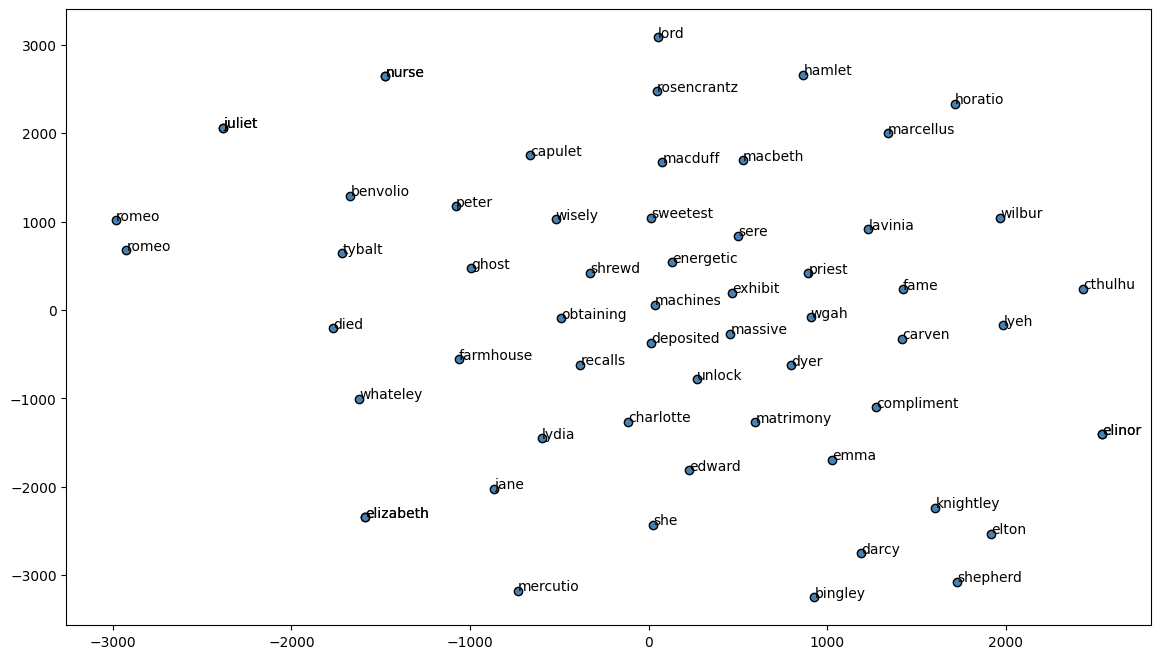

In [404]:
visualize_word_embeddings(embeddings_150, main_characters, perplexity=20)

## 2.1 Relaciones analogas

In [405]:
relation = embeddings_100.wv['king']-embeddings_100.wv['queen']+embeddings_100.wv['woman']
embeddings_100.wv.most_similar([relation], topn=3)

[('woman', 0.6895979046821594),
 ('king', 0.5975649952888489),
 ('tyranny', 0.44213902950286865)]

In [406]:
relation = embeddings_100.wv['good']-embeddings_100.wv['bad']+embeddings_100.wv['evil']
embeddings_100.wv.most_similar([relation], topn=3)

[('good', 0.8230366706848145),
 ('less', 0.40129825472831726),
 ('unless', 0.37168440222740173)]

In [407]:
relation = embeddings_100.wv['woman']-embeddings_100.wv['women']+embeddings_100.wv['men']
embeddings_100.wv.most_similar([relation], topn=3)

[('men', 0.751902163028717),
 ('woman', 0.6477683782577515),
 ('man', 0.4243449866771698)]

In [408]:
relation = embeddings_100.wv['father']-embeddings_100.wv['girl']+embeddings_100.wv['boy']
embeddings_100.wv.most_similar([relation], topn=3)

[('father', 0.7150528430938721),
 ('boy', 0.4464912712574005),
 ('backe', 0.4293372333049774)]

# 3.Creacion del dataset

In [409]:
def create_dataset(auth_1:list, auth_2:list, auth_3:list, sentence_len:int=150):
    """
    Create a dataset with the books of the three authors
    Params:
    -------
        auth_1: list of books of the first author
        auth_2: list of books of the second author
        auth_3: list of books of the third author
        sentence_len: length of the sentences to create
    Returns:
    --------
        dataset: pandas dataframe with the sentences and the author
    """
    data_frame = pd.DataFrame(columns=['fragment', 'author'])
    for book in auth_1:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 0})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len//4
    for book in auth_2:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 1})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len
    for book in auth_3:
        tokenized_book = tokenize(book)
        num_words = len(tokenized_book)
        j = sentence_len
        while j < num_words:
            df = pd.DataFrame({'fragment': [tokenized_book[j-sentence_len:j]], 'author': 2})
            data_frame = pd.concat([data_frame, df], ignore_index=True)
            j += sentence_len//4
    return data_frame
sentence_len = 150
dataset = create_dataset(shakespeare_books, jane_austen_books, lovecraft_books, sentence_len=sentence_len)

In [410]:
dataset

,fragment,author
0,"[hamlet, prince, of, denmark, author, william,...",0
1,"[barnardo, barnardo, he, francisco, you, come,...",0
2,"[you, had, quiet, guard, francisco, not, mouse...",0
3,"[ho, who, is, there, horatio, friends, to, thi...",0
4,"[exit, marcellus, holla, barnardo, barnardo, s...",0
...,...,...
9872,"[but, that, had, mostly, to, do, with, the, pl...",2
9873,"[not, he, declares, anything, connected, with,...",2
9874,"[of, those, other, violet, westward, mountains...",2
9875,"[with, five, dimensions, the, nameless, cylind...",2


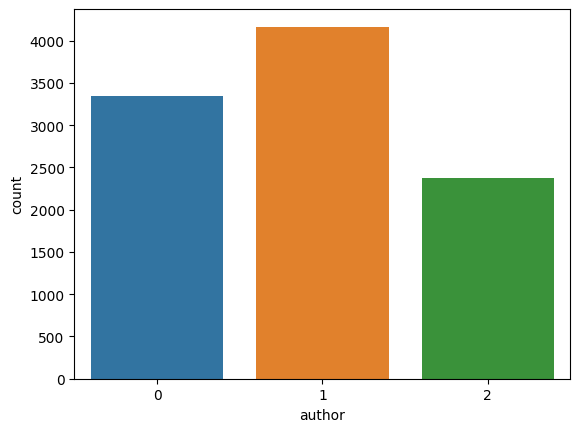

In [411]:
import seaborn as sns

ax = sns.countplot(x="author", data=dataset)

## 3.1 Particion de los datos en train, validation y test

In [412]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
list(embeddings_50.wv.key_to_index.keys())
vocab = [[word] for word  in list(embeddings_50.wv.key_to_index.keys())]
tokenizer.fit_on_texts(vocab)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

14452

In [413]:
embedding_matrix_50 = np.zeros((vocab_size, 50))  # Inicializa con ceros
for word, i in tokenizer.word_index.items():
    if word in embeddings_50.wv:  # Verifica si la palabra está en los embeddings de Gensim
        embedding_matrix_50[i] = embeddings_50.wv[word]

In [425]:
from keras_preprocessing.sequence import pad_sequences
dataset.dropna(inplace=True, axis=0)
dataset['sequence'] = tokenizer.texts_to_sequences(dataset['fragment'])
dataset['sequence'] = np.asarray(pad_sequences(dataset['sequence'], maxlen=sentence_len, padding='post'), dtype='float32')
dataset['author'] = dataset['author'].apply(lambda x: np.asarray(x).astype(np.float32))

In [415]:
dataset['sequence']

0       [211, 1588, 4, 2705, 3066, 412, 2534, 650, 572...
1       [2320, 2320, 14, 4687, 12, 109, 91, 2161, 129,...
2       [12, 15, 755, 2185, 4687, 11, 5815, 3742, 2320...
3       [1263, 69, 21, 46, 608, 300, 3, 34, 717, 1668,...
4       [662, 1668, 8119, 2320, 2320, 92, 41, 21, 608,...
                              ...                        
9872    [20, 9, 15, 4225, 3, 43, 18, 1, 4, 2106, 52, 1...
9873    [11, 14, 4926, 279, 1322, 18, 1, 4334, 2, 5880...
9874    [4, 165, 94, 7640, 3215, 1347, 32, 1, 189, 731...
9875    [18, 386, 4501, 1, 1844, 9206, 1, 1558, 3930, ...
9876    [3606, 8872, 20, 58, 14, 21, 1030, 145, 14, 11...
Name: sequence, Length: 9877, dtype: object

In [440]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(dataset['sequence'], dataset['author'], test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50)


In [441]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [442]:
input_len = sentence_len 

model = Sequential()
# Add input embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim = 50, weights=[embedding_matrix_50], input_length=sentence_len, trainable=False))
# Add LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.3))
# Add output layer
model.add(Dense(3, activation='softmax'))

In [443]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 50)           722600    
                                                                 
 lstm_11 (LSTM)              (None, 100)               60400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 303       
                                                                 
Total params: 783,303
Trainable params: 60,703
Non-trainable params: 722,600
_________________________________________________________________


In [444]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [445]:
model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=30, verbose=1)

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001D2066D6020>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001D2066D6020>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

ValueError: Exception encountered when calling layer 'sequential_13' (type Sequential).

Input 0 of layer "lstm_11" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

Call arguments received by layer 'sequential_13' (type Sequential):
  • inputs=tf.Tensor(shape=(None,), dtype=float32)
  • training=True
  • mask=None

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)